In [1]:
import requests
import json
import urllib2, time, random, re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import sqlalchemy

In [2]:
zomato_key = "a1cbf1820d81838fed9b0a0b92e0843b"

In [ ]:
zomparams = {
        "entity_id": 94741,
        "entity_type": "zone",
        "cuisines": 55
}

In [ ]:
headers = {"user-key":zomato_key,
          "Accept": "application/json"}

In [ ]:
results = json.load(open("./menuscraper/testjson.json", "r"))

In [ ]:
menuurls = []
for item in results["restaurants"]:
    try:
        print item["restaurant"]["menu_url"]
        menuurls.append(item["restaurant"]["menu_url"])
    except:
        print "No menu"

In [ ]:
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
           'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
           'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
           'Accept-Encoding': 'none',
           'Accept-Language': 'en-US,en;q=0.8','Connection': 'keep-alive'}


In [ ]:
#Parse menu items from a scraped menu URL

menu_items = []
for url in list(set(menus))[:100]:
    try:
        soup = BeautifulSoup(urllib2.urlopen(urllib2.Request(url, headers=hdr)).read())
        url_list = []
        for post in soup.find_all("div", class_="tmi-name ft16 mt10 mb5"):
            menu_items.append(str(post).split("\n")[1].lstrip())
    except:
        print url
        #     if("Answered by" in post.find("span",class_="dq_topic_author").text):
        #         url_list.append(post.find("a")['href'])

In [ ]:
len(menu_items)

In [ ]:
def parse_json_for_menus(jsonfile):
    menuurls = []
    results = json.load(open(jsonfile, "r"))
    for item in results["restaurants"]:
        try:
            print item["restaurant"]["menu_url"]
            menuurls.append(item["restaurant"]["menu_url"])
        except:
            print "No menu"
    return menuurls


In [ ]:
jsonfile = "./menuscraper/san_francisco.json"

In [ ]:
sf = parse_json_for_menus(jsonfile)

In [ ]:
len(sf)

```san francisco center: (37.774929, -122.419416)
topright: (37.802501, -122.401772)
bottomright: (37.738182, -122.377739)
bottomleft:(37.733566, -122.506142)
topleft: (37.779168, -122.511978)```

In [ ]:
topleft = [37.78, -122.51]
bottomright = [37.74, -122.38]

In [3]:
import urllib
import urllib2
def grid_hack(coords):
    url = 'https://developers.zomato.com/api/v2.1/search'

    values = {
        'lat': coords[0],
        'lon': coords[1],
        'radius': 5000
    }

    data = urllib.urlencode(values)
    urlstr = url + "?" + data
    req = urllib2.Request(urlstr)
    req.add_header("Accept", "application/json")
    req.add_header("user-key", "a1cbf1820d81838fed9b0a0b92e0843b")
    response = urllib2.urlopen(req)
    output = response.read()
    return output

In [4]:
req.get_method()

NameError: name 'req' is not defined

In [ ]:
def coords_across_grid():
    nx, ny = (30,30)
    x = np.linspace(37.78, 37.74, nx)
    y = np.linspace(-122.51,-122.38, ny)
    xv,yv=np.meshgrid(x,y)

    xlist=[]
    for item in xv:
        for subitem in item:
            xlist.append(subitem)

    ylist = []
    for item in yv:
        for subitem in item:
            ylist.append(subitem)

    coords = zip(xlist, ylist)
    return coords

In [ ]:
coords = coords_across_grid

In [ ]:
def get_restaurants_by_geo(coords):
    for index, item in enumerate(coords[2:]):
        out = grid_hack(item)
        with open(str("output/" + str(index) + ".json"), "w") as f:
            f.write(out)

In [ ]:
get_restaurants_by_geo(coords)

**Start running from here

In [ ]:
import os
import json

Read from extracted jsons

In [ ]:
names = []
for filename in os.listdir("./output"):
    with open(str("./output/" + filename), "r") as file:
        dictout = json.load(file)
        for item in dictout["restaurants"]:
            names.append(item["restaurant"]["name"])

In [ ]:
len(names)

In [ ]:
item["restaurant"]["menu_url"]

In [ ]:
def extract_menu_urls_from_json(directory = "./output"):
    menus = []
    for filename in os.listdir(directory):
        with open(str("./output/" + filename), "r") as file:
            dictout = json.load(file)
            for item in dictout["restaurants"]:
                menus.append(item["restaurant"]["menu_url"])
    return menus

In [ ]:
menus = extract_menu_urls_from_json()

In [ ]:
len(set(menus))

In [ ]:
# hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
#            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
#            'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
#            'Accept-Encoding': 'none',
#            'Accept-Language': 'en-US,en;q=0.8','Connection': 'keep-alive'}

# menu_items = []
# for url in list(set(menus)):
#     try:
#         soup = BeautifulSoup(urllib2.urlopen(urllib2.Request(url, headers=hdr)).read())
#         url_list = []
#         for post in soup.find_all("div", class_="tmi-name ft16 mt10 mb5"):
#             menu_items.append(str(post).split("\n")[1].lstrip())
#     except:
#         print url

In [5]:
from sqlalchemy import create_engine, Column, Integer, String, Float, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship, sessionmaker

In [6]:
def flatten_db(dictout):
    for index, item in enumerate(dictout["restaurants"]):
        for key, value in item["restaurant"].iteritems():
            if type(value) == dict:
                testme = (key,value)
                dictout["restaurants"][index]["restaurant"][str(key)] = json.dumps(value)
    return dictout

Now that we've got the jsons, first: parse jsons and flatten.

In [ ]:
flatdictout = []
for filename in os.listdir("./output"):
    dictout=[]
    with open(str("./output/" + filename), "r") as file:
        dictout.append(flatten_db(json.load(file)))
    for item in dictout:
        flatdictout.extend(item["restaurants"])
#pd.DataFrame.from_dict([item["restaurant"] for item in flatdictout]).to_sql('restaurants', engine, if_exists='replace')

In [ ]:
testitem = flatdictout[0]

In [ ]:
testitem

In [ ]:
testitem["restaurant"]["R"]

For each restaurant, grab its menu and make a separate object for that. Also grab descriptions of menu items (and categories?)

In [7]:
dbname = 'restaurants'
username = 'andylane'
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://andylane@localhost/restaurants


In [8]:
Base = declarative_base()

In [9]:
class Restaurant(Base):
    __tablename__ = 'restaurants'
    id = Column(Integer, primary_key=True)
    name = Column(String)
    url = Column(String)
    zomatoID = Column(Integer, unique=True)
    costfortwo = Column(Float)
    featured_image = Column(String)
    photos = Column(String)
    menu_url = Column(String)
    price_range = Column(Integer)
    latitude = Column(Float)
    longitude = Column(Float)
    address = Column(String)
    
    def __repr__(self):
        return "<Restaurant(name='%s', url='%s')>" % (
            self.name, self.url)

In [10]:
class MenuItem(Base):
    __tablename__ = 'menuitems'
    id = Column(Integer, primary_key=True)
    menuitem = Column(String, nullable = False)
    description = Column(String)
    restaurant_id = Column(Integer, ForeignKey('restaurants.id'))
    price = Column(String)
    
    restaurant = relationship(Restaurant, back_populates = 'menuitems')
    __table_args__ = {'extend_existing': True}
    def __repr__(self):
        return "<Restaurant(name='%s', url='%s')>" % (
            self.name, self.url)

In [11]:
Restaurant.menuitems = relationship("MenuItem", order_by=MenuItem.id, back_populates="restaurant")

In [12]:
Base.metadata.create_all(engine)

In [ ]:
restaurantitem = testitem["restaurant"]

In [ ]:
superjsondict = flatdictout

In [28]:
Session = sessionmaker(bind=engine)
session = Session()

In [13]:
import unicodedata

In [ ]:
unicodedata.normalize('NFD', restaurant["menu_url"]).encode("ascii", "ignore")

In [ ]:
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
           'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
           'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
           'Accept-Encoding': 'none',
           'Accept-Language': 'en-US,en;q=0.8','Connection': 'keep-alive'}
failedurls = []
menu_items = []
for individual_restaurant in superjsondict:
    restaurant = individual_restaurant["restaurant"]
    menu_url = unicodedata.normalize('NFD', restaurant["menu_url"]).encode("ascii", "ignore")
    
    #Get the menu items
    menu_page = BeautifulSoup(urllib2.urlopen(urllib2.Request(menu_url,"lxml",headers=hdr,)).read())
    menu = []
    for menu_item in menu_page.find_all("div", class_="tmi-name"):
        menuitem_p ={}
        menuitem_p['name'] = menu_item.contents[0].strip()
        try:
            menuitem_p['description'] = menu_item.find_all("div", class_="tmi-desc-text")[0].contents[0].strip()
        except:
            menuitem_p['description'] = ""
        try:
            menuitem_p['price'] = menu_item.find_all("div", class_="tmi-price-txt")[0].contents[0].strip()
        except:
            menuitem_p['price'] = ""
        menu.append(menuitem_p)

    
    try:
        session.add(Restaurant(
            name=restaurant["name"], 
            url = restaurant["url"],
            zomatoID = restaurant["id"],
            costfortwo = restaurant["average_cost_for_two"],
            featured_image = restaurant["featured_image"],
            photos = restaurant["photos_url"],
            menu_url = restaurant["menu_url"],
            price_range = restaurant["price_range"],
            latitude = json.loads(restaurant["location"])["latitude"],
            longitude = json.loads(restaurant["location"])["longitude"],
            address = restaurant["location"],

            menuitems=[MenuItem(menuitem = item["name"], 
                                description = item["description"], 
                                price=item["price"]) for item in menu]
                           ))


        try:
            session.commit()
        except (sqlalchemy.exc.DataError, sqlalchemy.exc.IntegrityError, sqlalchemy.exc.InvalidRequestError):
            print("Sanitize your data, man")
            session.rollback()
            failedurls.append(menu_url)
    except (sqlalchemy.exc.IntegrityError, sqlalchemy.exc.InvalidRequestError):
        print restaurant["url"]

In [ ]:
session.rollback()

In [ ]:
restaurant["menu_url"]

In [ ]:
menu_items = []

In [ ]:
restaurantitem = flatdictout[8]["restaurant"]

In [ ]:
restaurantitem["menu_url"]

In [ ]:
menu_page = BeautifulSoup(urllib2.urlopen(urllib2.Request(restaurantitem["menu_url"],"lxml",headers=hdr,)).read())
for menu_item in menu_page.find_all("div", class_="tmi-name ft16 mt10 mb5"):
    menu_items.append(str(menu_item).split("\n")[1].lstrip())


In [ ]:
menu_page.find_all("div", class_="tmi-name")[0]

In [ ]:
list(set(menus))[22]

In [ ]:
for item in dictout["restaurants"]:
    names.append(item["restaurant"]["name"])

In [ ]:
len(set(names))

In [ ]:
namesstr = " ".join(menu_items)

In [14]:
class Recipe(Base):
    __tablename__ = 'recipes'
    
    id = Column(Integer, primary_key=True)
    name = Column(String)
    url = Column(String, unique=True)
    calories = Column(Integer)
    fat = Column(Float)
    carbs = Column(Float)
    protein = Column(Float)
    cholesterol = Column(Float)
    sodium = Column(Float)
    servings = Column(Integer)
    #ingredients = 
    #__table_args__ = {'extend_existing': True}
    
    def __repr__(self):
        return "<Recipe(name='%s', url='%s')>" % (
            self.name, self.url)
    
class Ingredient(Base):
    __tablename__ = 'ingredients'
    id = Column(Integer, primary_key = True)
    ingredient = Column(String, nullable = False)
    recipe_id = Column(Integer, ForeignKey('recipes.id'))
    
    recipe = relationship(Recipe, back_populates = 'ingredients')
    #__table_args__ = {'extend_existing': True}
    def __repr__(self):
        return "<Ingredient(ingredient='%s')>" % self.ingredient

Recipe.ingredients = relationship("Ingredient", order_by=Ingredient.id, back_populates="recipe")

In [ ]:
q = "Chicken"

In [ ]:
a = engine.execute("SELECT name FROM recipes WHERE UPPER(NAME) CONTAINS UPPER('%%Chicken%%')")

In [ ]:
a.fetchall()

In [ ]:
dir(session.query(Recipe))

In [ ]:
(name=str(q)).all()

In [ ]:
session.rollback()

In [ ]:
menu_item_name = "Chicken"

In [ ]:
a = engine.execute("SELECT name, fat FROM recipes WHERE name LIKE %s", (str("%" + menu_item_name + "%")))



DatabaseError: Execution failed on sql '('SELECT name, fat FROM recipes WHERE name LIKE %s', '%Chicken%')': argument 1 must be a string or unicode object


In [ ]:
query('SELECT * FROM recipes WHERE name LIKE %s', '%Chicken%')

In [18]:
import psycopg2

In [19]:
con = None
con = psycopg2.connect(database = "restaurants", user = "andylane")

In [ ]:
query = session.query(Recipe).filter(Recipe.name.ilike("%chicken cacciatore%"))

In [ ]:
query = "SELECT * FROM recipes WHERE name LIKE \'%s\'" % str("%" + menu_item_name + "%")
print query
query_results=pd.read_sql_query(smart_str(query),con)

In [ ]:
query_results

In [ ]:
a.fetchall()

In [ ]:
session.query(Recipe).filter(Recipe.name.ilike("%chicken cacciatore%")).all()

In [ ]:
for item in session.query(Recipe).filter(Recipe.name.ilike("%cacciatore%")):
    print item.ingredients

In [ ]:
session.rollback()

In [ ]:
from __future__ import unicode_literals
from django.utils.encoding import smart_str, smart_unicode

for item in session.query(Recipe).filter(( Recipe.ingredients)).all():
    print smart_str(item.ingredients)

In [ ]:
from __future__ import unicode_literals
from django.utils.encoding import smart_str, smart_unicode

for item in session.query(Recipe).filter(Recipe.name.ilike("%cacciatore%")):
    print smart_str(item)

In [15]:
ingredient_query = "SELECT ingredients.ingredient FROM ingredients WHERE recipe_id = \'%s\'" % 801

In [16]:
from collections import Counter

In [20]:
pd.read_sql_query(ingredient_query, con)["ingredient"]

0                     [u'1 tablespoon unsalted butter']
1                        [u'1/3 cup all-purpose flour']
2                                [u'1/4 teaspoon salt']
3       [u'4 skinless, boneless chicken breast halves']
4                                 [u'2 lemons, juiced']
5                              [u'1 cup chicken broth']
6               [u'2 tablespoons Worcestershire sauce']
7                                 [u'1/4 cup vermouth']
8                       [u'1/2 teaspoon minced garlic']
9                                       [u'1 bay leaf']
10                          [u'1 teaspoon dried basil']
11    [u'1 (14 ounce) can artichoke hearts, drained ...
12                         [u'1 tablespoon cornstarch']
13                                   [u'1/4 cup water']
Name: ingredient, dtype: object

In [21]:
ingredient_query = "SELECT ingredients.ingredient, ingredients.recipe_id FROM ingredients"

In [22]:
all_ings = pd.read_sql_query(ingredient_query, con)

In [23]:
all_ings["ingredient"]

0                                        [u'3/4 cup milk']
1                         [u'2 tablespoons white vinegar']
2                             [u'1 cup all-purpose flour']
3                           [u'2 tablespoons white sugar']
4                            [u'1 teaspoon baking powder']
5                            [u'1/2 teaspoon baking soda']
6                                   [u'1/2 teaspoon salt']
7                                               [u'1 egg']
8                        [u'2 tablespoons butter, melted']
9                                       [u'cooking spray']
10                           [u'2 tablespoons canola oil']
11                                [u'1 pound ground beef']
12                           [u'1/2 clove garlic, minced']
13           [u'1 (15 ounce) can kidney beans, undrained']
14                              [u'1/2 cup chopped onion']
15                     [u'1/2 green bell pepper, chopped']
16                      [u'1 (15 ounce) can tomato sauce

In [24]:
list_of_ingredient_words = "".join(list(all_ings["ingredient"])).split(" ")

In [25]:
counter = Counter(list_of_ingredient_words)

In [26]:
counter.most_common()[:10]

[('cup', 7726),
 ('teaspoon', 5569),
 ('tablespoons', 3626),
 ('ounce)', 2926),
 ('ground', 2559),
 ('tablespoon', 2484),
 ('cups', 2204),
 ('and', 2114),
 ('to', 1917),
 ('fresh', 1629)]

In [154]:
from numpy import mean, average

In [165]:
# Find frequency of ingredient use and correlate it with total calories of dish containing that ingredient
recipeids = []
for item, count in counter.most_common()[:150]: #Gets out the top 150 of ranked list of ingredient frequencies
    itemstr = str("%" + item + "%") #Wraps it in wildcards for SQL
    a = session.query(Ingredient).filter(Ingredient.ingredient.ilike(str(itemstr))).add_columns("recipe_id")
    recipeids.append(([b[1] for b in a], item, count))

annotated_recipes = []
for c in recipeids:
    meanable = []
    if len(c[0]) > 0:
        for d in c[0]:
            meanable.append([item[1] for item in session.query(Recipe).filter(Recipe.id == d).add_columns("calories").all()])
        #meanable = [item[0] for item in meanable]
        meancalories =  mean(meanable)
        annotated_recipes.append((c[1], meancalories, len(c[0])))

In [169]:
pd.DataFrame(annotated_recipes)

,0,1,2
0,cup,429.252967,9942
1,teaspoon,394.354853,6986
2,tablespoons,413.602207,3625
3,ounce),444.250854,2926
4,ground,409.000371,2694
5,tablespoon,415.743330,6109
6,cups,428.347944,2213
7,and,439.106365,2341
8,to,440.475623,4615
9,fresh,425.145397,1912


In [166]:
print annotated_recipes

[('cup', 429.25296720981692, 9942), ('teaspoon', 394.35485256226741, 6986), ('tablespoons', 413.60220689655171, 3625), ('ounce)', 444.25085440874915, 2926), ('ground', 409.0003711952487, 2694), ('tablespoon', 415.74332951383207, 6109), ('cups', 428.34794396746497, 2213), ('and', 439.10636480136696, 2341), ('to', 440.47562296858069, 4615), ('fresh', 425.14539748953973, 1912), ('chopped', 413.51300479123887, 2922), ('chicken', 442.62605277933744, 1781), ('black', 426.4764183185236, 1463), ('1/2', 421.88192731458639, 6081), ('teaspoons', 389.49152542372883, 1416), ('or', 421.082085948817, 4142), ('pepper', 426.18714156353758, 3313), ('can', 424.51118963486454, 1698), ('white', 415.08547717842322, 1205), ('into', 449.85537583254046, 1051), ('cut', 451.02922374429221, 1095), ('olive', 447.87909090909091, 1100), ('pound', 447.89390962671905, 2036), ('garlic,', 415.75413223140498, 968), ('boneless', 422.97257590597451, 1021), ('dried', 425.31075268817204, 930), ('onion,', 418.56601607347875, 

In [175]:
annotated_recipes_df = pd.DataFrame(annotated_recipes)

In [176]:
annotated_recipes_df.columns = ["ing", "cals", "count"]

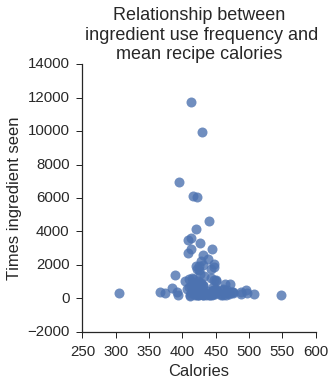

In [186]:
%matplotlib inline
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")


sns.lmplot("cals", "count", 
           data= annotated_recipes_df,
           fit_reg=False, 
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Relationship between\n ingredient use frequency and\nmean recipe calories')
plt.xlabel('Calories')
plt.ylabel('Times ingredient seen')

In [102]:
d

1

In [101]:
session.rollback()

In [90]:
recipeids

[([], "cornstarch'][u'12", 1),
 ([], "Onions'][u'1", 1),
 ([], "tails'][u'salt", 1),
 ([], 'Hershey\'s\\xae)"][u\'1/2', 1),
 ([], 'Hershey\'s\\xae)"][u\'1/4', 1),
 ([], "(above)'][u'1/2", 1),
 ([], "greens'][u'2", 1),
 ([], "'][u'1/2", 1),
 ([1788, 2272, 2284, 2554, 2638, 2782, 2822, 3312, 3430, 3590], 'pods', 1),
 ([], 'pan\'][u"4', 1)]

In [79]:
c.iteritems

[30,
 77,
 103,
 104,
 122,
 122,
 122,
 122,
 151,
 159,
 170,
 181,
 186,
 195,
 198,
 210,
 217,
 240,
 245,
 267,
 389,
 409,
 426,
 432,
 481,
 485,
 509,
 529,
 538,
 542,
 565,
 579,
 580,
 581,
 615,
 619,
 621,
 629,
 693,
 707,
 752,
 766,
 783,
 783,
 787,
 812,
 830,
 842,
 843,
 865,
 883,
 922,
 940,
 940,
 952,
 960,
 965,
 965,
 969,
 973,
 998,
 1026,
 1071,
 1084,
 1090,
 1099,
 1133,
 1151,
 1176,
 1177,
 1181,
 1203,
 1204,
 1226,
 1255,
 1264,
 1271,
 1273,
 1286,
 1291,
 1291,
 1307,
 1316,
 1323,
 1348,
 1368,
 1404,
 1425,
 1443,
 1448,
 1449,
 1450,
 1473,
 1516,
 1517,
 1518,
 1520,
 1533,
 1548,
 1561,
 1567,
 1572,
 1572,
 1595,
 1630,
 1638,
 1677,
 1717,
 1731,
 1753,
 1766,
 1793,
 1809,
 1817,
 1819,
 1823,
 1827,
 1830,
 1876,
 1889,
 1916,
 1917,
 1920,
 1922,
 1941,
 1950,
 1962,
 1971,
 2002,
 2005,
 2013,
 2013,
 2040,
 2048,
 2055,
 2064,
 2071,
 2080,
 2094,
 2104,
 2129,
 2134,
 2138,
 2164,
 2172,
 2175,
 2207,
 2209,
 2215,
 2226,
 2237,
 2250,

In [45]:
item

'(4'

In [46]:
recipeids

[[30,
  77,
  103,
  104,
  122,
  122,
  122,
  122,
  151,
  159,
  170,
  181,
  186,
  195,
  198,
  210,
  217,
  240,
  245,
  267,
  389,
  409,
  426,
  432,
  481,
  485,
  509,
  529,
  538,
  542,
  565,
  579,
  580,
  581,
  615,
  619,
  621,
  629,
  693,
  707,
  752,
  766,
  783,
  783,
  787,
  812,
  830,
  842,
  843,
  865,
  883,
  922,
  940,
  940,
  952,
  960,
  965,
  965,
  969,
  973,
  998,
  1026,
  1071,
  1084,
  1090,
  1099,
  1133,
  1151,
  1176,
  1177,
  1181,
  1203,
  1204,
  1226,
  1255,
  1264,
  1271,
  1273,
  1286,
  1291,
  1291,
  1307,
  1316,
  1323,
  1348,
  1368,
  1404,
  1425,
  1443,
  1448,
  1449,
  1450,
  1473,
  1516,
  1517,
  1518,
  1520,
  1533,
  1548,
  1561,
  1567,
  1572,
  1572,
  1595,
  1630,
  1638,
  1677,
  1717,
  1731,
  1753,
  1766,
  1793,
  1809,
  1817,
  1819,
  1823,
  1827,
  1830,
  1876,
  1889,
  1916,
  1917,
  1920,
  1922,
  1941,
  1950,
  1962,
  1971,
  2002,
  2005,
  2013,
  2013,
  2040,

In [ ]:
counter.iteritems()

In [53]:
counter.most_common()

[('cup', 7726),
 ('teaspoon', 5569),
 ('tablespoons', 3626),
 ('ounce)', 2926),
 ('ground', 2559),
 ('tablespoon', 2484),
 ('cups', 2204),
 ('and', 2114),
 ('to', 1917),
 ('fresh', 1629),
 ('chopped', 1508),
 ('chicken', 1468),
 ('black', 1429),
 ('1/2', 1423),
 ('teaspoons', 1416),
 ('or', 1283),
 ('pepper', 1227),
 ('can', 1202),
 ('white', 1138),
 ('into', 1038),
 ('cut', 1032),
 ('olive', 1000),
 ('pound', 978),
 ('garlic,', 968),
 ('boneless', 938),
 ('dried', 879),
 ('onion,', 867),
 ('package', 794),
 ('red', 794),
 ('cloves', 774),
 ('all-purpose', 758),
 ("taste'][u'1", 687),
 ('pounds', 652),
 ('green', 641),
 ('as', 636),
 ('skinless,', 623),
 ('large', 613),
 ("oil'][u'1", 608),
 ('breast', 594),
 ('vegetable', 593),
 ('pork', 584),
 ("chopped'][u'1", 577),
 ('garlic', 545),
 ('brown', 545),
 ('sliced', 518),
 ('grated', 493),
 ('ounces', 486),
 ('pepper,', 483),
 ('shredded', 477),
 ("salt'][u'1", 472),
 ("pepper'][u'1", 471),
 ('lemon', 463),
 ('dry', 449),
 ('(8', 437),


In [56]:
list_of_ingredient_words[:10]

["[u'3/4",
 'cup',
 "milk'][u'2",
 'tablespoons',
 'white',
 "vinegar'][u'1",
 'cup',
 'all-purpose',
 "flour'][u'2",
 'tablespoons']

In [54]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [55]:
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
sns.distplot(list_of_ingredient_words, kde=False, rug=True);

In [57]:
titanic = sns.load_dataset("titanic")


In [61]:
laa = pd.DataFrame(list_of_ingredient_words)

In [75]:
laa

,0
0,[u'3/4
1,cup
2,milk'][u'2
3,tablespoons
4,white
5,vinegar'][u'1
6,cup
7,all-purpose
8,flour'][u'2
9,tablespoons


In [63]:
ax = sns.countplot(x=0, data=laa)

In [76]:
len(laa)

151221

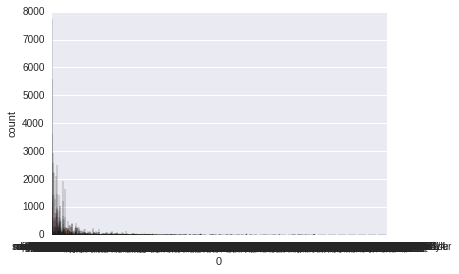

In [74]:
%matplotlib inline
sns.countplot(x=0, data=laa)

In [ ]:
from os import path
from wordcloud import WordCloud


# Read the whole text.
text = namesstr
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
#image = wordcloud.to_image()
#image.show()aa